# The integral TMA4101
> **Tasks from Integral TMA4101**

### Task 1
> **1.**  Plot the function (too complicated) over the histogram of the measured plank data.

In [2]:
# Imports
import numpy as np

# Import data from csv file
with open('kai.csv', 'r') as f:
    data = np.loadtxt(f, delimiter=',')
    
widths = [data[i][1] for i in range(len(data))]

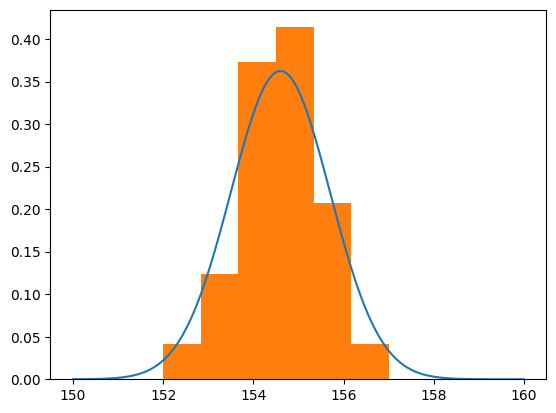

In [3]:
# Define variables and the function
mu = 154.6 # Mean width in mm
sigma = 1.1 # Standard deviation in mm

def f(x):
    """Normal distribution function"""
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

# Plot the function and histogram of the data
import matplotlib.pyplot as plt

plt.plot(np.linspace(150, 160, 100), f(np.linspace(150, 160, 100)))
plt.hist(widths, bins=6, density=True)
plt.show()


### Task 2
> **2.**  Try to find the area under the normal distribution curve from x = 0 to x = 1.

In [4]:
# Standard normal distribution function
def g(x):
    """Standard normal distribution function"""
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

# Find area under the curve from x = 0 to x = 1
from scipy import integrate

area, error = integrate.quad(g, 0, 1)
print('Area under the curve from x = 0 to x = 1:', area)

Area under the curve from x = 0 to x = 1: 0.3413447460685429


### Task 3 and 6
> **3.**  Try to find the area under the normal distribution curve from x = 0 to x = 1 using Riemann sums.

In [5]:
# Find area under the curve from x = 0 to x = 1 using left Riemann sum
def left_riemann_sum(f, a, b, N):
    """Left Riemann sum"""
    x = np.linspace(a, b, N+1)
    y = f(x[:-1])
    dx = (b-a)/N
    return np.sum(y*dx)

# Find area under the curve from x = 0 to x = 1 using right Riemann sum
def right_riemann_sum(f, a, b, N):
    """Right Riemann sum"""
    x = np.linspace(a, b, N+1)
    y = f(x[1:])
    dx = (b-a)/N
    return np.sum(y*dx)

# Find area under the curve from x = 0 to x = 1 using midpoint Riemann sum
def midpoint_riemann_sum(f, a, b, N):
    """Midpoint Riemann sum"""
    x = np.linspace(a, b, N+1)
    x_mid = (x[:-1] + x[1:])/2
    y = f(x_mid)
    dx = (b-a)/N
    return np.sum(y*dx)

# Find area under the curve from x = 0 to x = 1 using trapezoidal rule
def trapezoidal_rule(f, a, b, N):
    """Trapezoidal rule"""
    x = np.linspace(a, b, N+1)
    y = f(x)
    dx = (b-a)/N
    return dx*(np.sum(y) - 0.5*(y[0] + y[-1]))

N = 100
truth = 0.3413447460685429
print('Area under the curve from x = 0 to x = 1 (Right):', right_riemann_sum(g, 0, 1, N), 'Error:', np.abs(truth - right_riemann_sum(g, 0, 1, N)))
print('Area under the curve from x = 0 to x = 1 (Left):', left_riemann_sum(g, 0, 1, N), 'Error:', np.abs(truth - left_riemann_sum(g, 0, 1, N)))
print('Area under the curve from x = 0 to x = 1 (Midpoint):', midpoint_riemann_sum(g, 0, 1, N), 'Error:', np.abs(truth - midpoint_riemann_sum(g, 0, 1, N)))
print('Area under the curve from x = 0 to x = 1 (Trapezoidal):', trapezoidal_rule(g, 0, 1, N), 'Error:', np.abs(truth - trapezoidal_rule(g, 0, 1, N)))


Area under the curve from x = 0 to x = 1 (Right): 0.34055787185970565 Error: 0.0007868742088372738
Area under the curve from x = 0 to x = 1 (Left): 0.34212758741852856 Error: 0.0007828413499856302
Area under the curve from x = 0 to x = 1 (Midpoint): 0.34134575428577646 Error: 1.0082172335335038e-06
Area under the curve from x = 0 to x = 1 (Trapezoidal): 0.3413427296391171 Error: 2.0164294258218085e-06


Here we can see that the Riemann sum is a good starting point as it is simple to implement and gives a good approximation of the area under the curve. However, it is not very accurate and we can see that the error is quite large, especially when we use a small number of rectangles.

<p></p>

As seen in the results, the midpoint gives the best approximation of the integral because both left and right Riemann sums are approximating the area under the curve with rectangles that are either too small or too large. The midpoint is a good compromise between the two.

<p></p>

The trapezoidal rule is also way better than left and right, but slightly worse than the midpoint. The Error of trapezoidal rule is approximately 0.000002 (N=100), compared to midpoint which is 0.000001 (N=100). 

### Task 8
> **8.** Find an approximation for $ \int_{0}^{\pi} \text{sinc}(x) \, dx \approx 1.85193705196 $ using both Riemann sums and the trapezoidal method. Compare the accuracy of the methods when using the same $ h $.


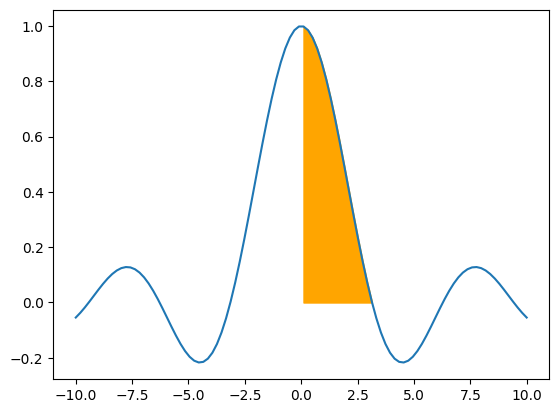

In [6]:
#Define new sinc function that handles singularity at x=0
def sinc(x):
    """Sinc function"""
    result = np.where(x == 0, 1, np.sin(x) / x)
    return result

# Visualize sinc function with area under the curve from x = 0 to x = pi
x = np.linspace(-10, 10, 100)
plt.fill_between(x, sinc(x), where=(x >= 0) & (x <= np.pi), color='orange')
plt.plot(x, sinc(x))
plt.show()

In [7]:
# Find the area under the sinc curve from x = 0 to x = pi using riemann sum
N = 100
truth = 1.851937051982466
print('Area under the curve from x = 0 to x = pi (Right):', right_riemann_sum(sinc, 0, np.pi, N), 'Error:', np.abs(truth - right_riemann_sum(sinc, 0, np.pi, N)))
print('Area under the curve from x = 0 to x = pi (Left):', left_riemann_sum(sinc, 0, np.pi, N), 'Error:', np.abs(truth - left_riemann_sum(sinc, 0, np.pi, N)))
print('Area under the curve from x = 0 to x = pi (Midpoint):', midpoint_riemann_sum(sinc, 0, np.pi, N), 'Error:', np.abs(truth - midpoint_riemann_sum(sinc, 0, np.pi, N)))
print('Area under the curve from x = 0 to x = pi (Trapezoidal):', trapezoidal_rule(sinc, 0, np.pi, N), 'Error:', np.abs(truth - trapezoidal_rule(sinc, 0, np.pi, N)))


Area under the curve from x = 0 to x = pi (Right): 1.8362029086068918 Error: 0.015734143375574217
Area under the curve from x = 0 to x = pi (Left): 1.8676188351427898 Error: 0.01568178316032376
Area under the curve from x = 0 to x = pi (Midpoint): 1.8519501420995959 Error: 1.3090117129799239e-05
Area under the curve from x = 0 to x = pi (Trapezoidal): 1.851910871874841 Error: 2.61801076251178e-05


/var/folders/3v/6dz70lt14pgbfvjsn53t8kdr0000gn/T/ipykernel_4373/1826433630.py:4: RuntimeWarning: invalid value encountered in divide
  result = np.where(x == 0, 1, np.sin(x) / x)


### Task 14
> **14.** Find a routine and calculate $ \int_{0}^{1}e^{-x^2/2} \, dx $.

In [8]:
# Define function to find area under the curve from x = 0 to x = 1 using Simpson's rule
def simpsons_rule(f, a, b, N):
    """Simpson's rule"""
    x = np.linspace(a, b, N+1)
    y = f(x)
    dx = (b-a)/N
    return dx/3*(np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2]) - 0.5*(y[0] + y[-1]))

def function(x):
    """Normal distribution function"""
    return np.exp(-x**2/2)

# Calculate
print(f"Area under the curve from x = 0 to x = 1 (Simpson's rule): {simpsons_rule(function, 0, 1, 100)}")
print(f"Validation (scipy.integrate.quad): {integrate.quad(function, 0, 1)[0]}")

Area under the curve from x = 0 to x = 1 (Simpson's rule): 0.8529468408600225
Validation (scipy.integrate.quad): 0.8556243918921488


### Task 15 and 16
> **Tets different RK methods and plot them together with an analytic solution**

In [9]:
# Define differential equations
# Ecoli diff eq -> x' = x
# Skydiving diff eq -> v' = 1 - v**2

def ecoli(x):
    """Ecoli differential equation"""
    return x

def skydiving(v):
    """Skydiving differential equation"""
    return 1 - v**2

# Step size
h = 0.1
N = int(10/h) # Number of steps

# Solve the differential equations using:

# 1. Euler's explicit method
def eulers_explicit_method(f, x0, h, N):
    """Euler's explicit method"""
    x = np.zeros(N+1)
    x[0] = x0
    for n in range(N):
        x[n+1] = x[n] + h*f(x[n])
    return x

# 2. Euler's implicit method (fixed-point iteration for initial value problem)
def fixed_point_iteration(f, x_initial, h):
    tolerance = 1e-10
    max_iterations = 100
    x = x_initial
    for _ in range(max_iterations):
        x_new = x_initial + h * f(x)
        if abs(x_new - x) < tolerance:
            return x_new
        x = x_new
    raise Exception("Fixed-point iteration did not converge")

def eulers_implicit_method(f, x0, h, N):
    """Euler's implicit method"""
    x = np.zeros(N+1)
    x[0] = x0
    for n in range(N):
        x[n+1] = fixed_point_iteration(f, x[n], h)
    return x

# 3. Midpoint method
def midpoint_method(f, x0, h, N):
    """Midpoint method"""
    x = np.zeros(N+1)
    x[0] = x0
    for n in range(N):
        k1 = f(x[n])
        k2 = f(x[n] + h/2 * k1)
        x[n+1] = x[n] + h * k2
    return x

# 4. Trapezoidal method
def trapezoidal_method(f, x0, h, N):
    """Trapezoidal method"""
    x = np.zeros(N+1)
    x[0] = x0
    for n in range(N):
        x[n+1] = x[n] + h/2*(f(x[n]) + f(x[n] + h*f(x[n])))
    return x

# 5. Heun's method
def heuns_method(f, x0, h, N):
    """Heun's method"""
    x = np.zeros(N+1)
    x[0] = x0
    for n in range(N):
        k1 = f(x[n])
        k2 = f(x[n] + h*k1)
        x[n+1] = x[n] + h/2 * (k1 + k2)
    return x

# 6. Analytical solution for ecoli diff eq
def analytical_solution_ecoli(f, x0, h, N):
    """Analytical solution"""
    x = np.zeros(N+1)
    x[0] = x0
    for n in range(N):
        x[n+1] = np.exp(n*h)
    return x

# 7. Analytical solution for skydiving diff eq
def analytical_solution_skydiving(f, x0, h, N):
    """Analytical solution"""
    x = np.zeros(N+1)
    x[0] = x0
    for n in range(N):
        x[n+1] = np.tanh(n*h)
    return x

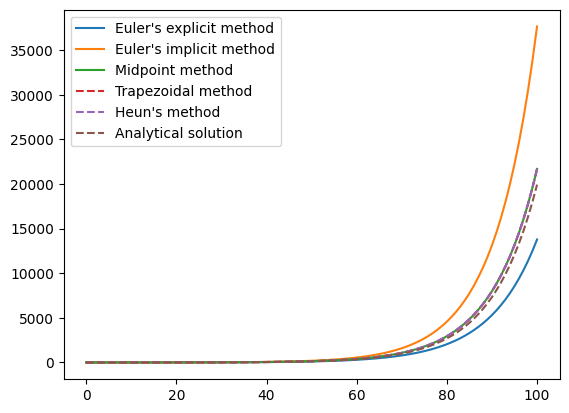

In [10]:
# Plot the solutions for ecoli differential equation
x = eulers_explicit_method(ecoli, 1, h, N)
plt.plot(x, label="Euler's explicit method")
x = eulers_implicit_method(ecoli, 1, h, N)
plt.plot(x, label="Euler's implicit method")
x = midpoint_method(ecoli, 1, h, N)
plt.plot(x, label="Midpoint method")
x = trapezoidal_method(ecoli, 1, h, N)
plt.plot(x, label="Trapezoidal method", linestyle='--')
x = heuns_method(ecoli, 1, h, N)
plt.plot(x, label="Heun's method", linestyle='--')
x = analytical_solution_ecoli(ecoli, 1, h, N)
plt.plot(x, label="Analytical solution", linestyle='--')
plt.legend()
plt.show()

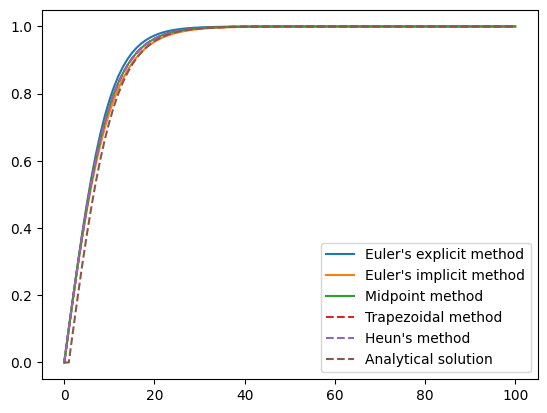

In [11]:
# Plot the solutions for skydiving differential equation
x = eulers_explicit_method(skydiving, 0, h, N)
plt.plot(x, label="Euler's explicit method")
x = eulers_implicit_method(skydiving, 0, h, N)
plt.plot(x, label="Euler's implicit method")
x = midpoint_method(skydiving, 0, h, N)
plt.plot(x, label="Midpoint method")
x = trapezoidal_method(skydiving, 0, h, N)
plt.plot(x, label="Trapezoidal method", linestyle='--')
x = heuns_method(skydiving, 0, h, N)
plt.plot(x, label="Heun's method", linestyle='--')
x = analytical_solution_skydiving(skydiving, 0, h, N)
plt.plot(x, label="Analytical solution", linestyle='--')
plt.legend()
plt.show()

### Task 17
> **Solve** Newtons law of cooling using Eulers explicit method and trapezoidal method, plot togheter with the analytical solution.

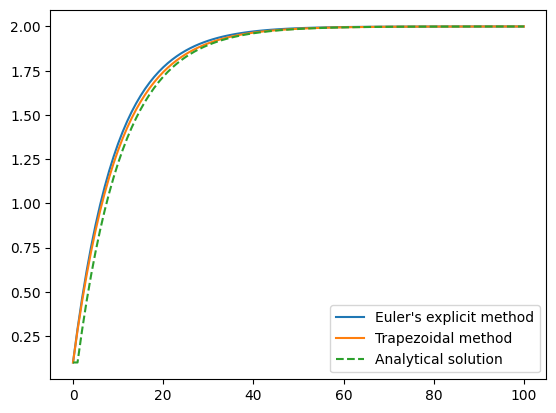

In [12]:
# Define Newtons law of cooling -> T_dot + T - 2 = 0, T0 = 1/10
def newtons_law_of_cooling(T):
    """Newton's law of cooling"""
    return -T + 2

# Analytical solution
def analytical_solution_cooling(f, x0, h, N):
    """Analytical solution T(t) = 2 - 19/10 * exp(-t)"""
    x = np.zeros(N+1)
    x[0] = x0
    for n in range(N):
        x[n+1] = 2 - 19/10 * np.exp(-n*h)
    return x

# Define values
h = 0.1
N = int(10 / h)
T0 = 1/10

# Solve and plot the differential equation
x = eulers_explicit_method(newtons_law_of_cooling, T0, h, N)
plt.plot(x, label="Euler's explicit method")
x = trapezoidal_method(newtons_law_of_cooling, T0, h, N)
plt.plot(x, label="Trapezoidal method")
x = analytical_solution_cooling(newtons_law_of_cooling, T0, h, N)
plt.plot(x, label="Analytical solution", linestyle='--')
plt.legend()
plt.show()


### Task 20

> **20-1**: Institutt for fysikk (Institute of Physics) has measured the gravitational acceleration 𝑔 ≈ 9.8214675 in the basement of the realfagsbygget (Science Building). You jump from the five-meter board at Pirbadet (the Pir Pool). What amount of work does gravity do on you until you hit the water surface?

> **20-2**: Newton's law of gravitation states that the gravitational force on you is 
$ 𝐹 (𝑟) = \dfrac{𝐺𝑚1𝑚2}{𝑟^2} $
where 𝐺 ≈ $ 6.67 ⋅ 10^{−11} 𝑁𝑚^2/𝑘𝑔^2 $ is the universal gravitational constant, $ 𝑚1 $ is the Earth's mass, $ 𝑚2 $ is your mass, and $ 𝑟 $ is your distance from the center of the Earth. Alan Eustace jumped in 2014 from a height of nearly 42 km. What amount of work did gravity do on him? 
(You can also watch the video of Felix Baumgartner's 2012 record from 39 km on YouTube.)

> **20-3**: What is the gravitational acceleration 42 km up? What is the relative error you make in the previous task if you assume $ 𝑔 ≈ 9.8214675 $ all the way from 42 km up to the ground? 
(Relative error is the error divided by the magnitude of the quantity being discussed. Relative error is important; if you measure the distance to the person next to you and miss by a meter, that's a pretty bad measurement, but if you measure the distance to the moon and miss by a meter, that's pretty good.)


In [13]:
# 20 - 1
# Work = integral(F(x))
def work_function(f, a, b, N):
    """Work"""
    x = np.linspace(a, b, N+1)
    y = f(x)
    dx = (b-a)/N
    return abs(np.sum(y*dx))

# Define constants
m = 75 # kg
g = 9.8214675 # m/s^2 (measured at NTNU by institute of physics)
h0 = 5 # m
hn = 0 # m

# Calculate work on the jump from h0 to hn using the work function
work = work_function(lambda x: m*g, h0, hn, 100)

print(f"Work on the jump from h0 = {h0} m to hn = {hn} m: {work} J")

Work on the jump from h0 = 5 m to hn = 0 m: 36.830503125 J


In [14]:
# 20 - 2
# Define the gravitational force on a mass m
def gravitational_force(m, r, G=6.67408e-11, M=5.972e24):
    """Gravitational force"""
    return G * M * m / r**2  # Negative as gravity pulls downward

# Constants
earth_radius = 6371e3  # meters
h0 = 41.42e3  # Initial height in meters
m = 75  # kg

# Corrected integration limits
r_initial = earth_radius + h0
r_final = earth_radius

# Calculate work on the jump from r_initial to r_final using the work function
work = work_function(lambda r: gravitational_force(m, r), r_final, r_initial, 100000)

print(f"The work gravity did on Alan Eustace: {abs(work / 1e6):.4f} MJ")


The work gravity did on Alan Eustace: 30.3080 MJ


In [15]:
# 20 - 3
# 1. Find the g 42 km above the surface of the earth
g42_force = gravitational_force(m, earth_radius + 42e3)
g42 = g42_force / m  # Convert force to acceleration

# 2. Calculate the relative error dividing the difference by g_0
error = abs((g42 - g) / g)

print(f"The relative error is: {(error*100):.2f}% (g(42 km) = {g42:.4f} m/s^2, g(0 km) = {g:.4f} m/s^2)")

The relative error is: 1.32% (g(42 km) = 9.6914 m/s^2, g(0 km) = 9.8215 m/s^2)


### Task 21
> **A container** with a piston contains an ideal gas. Vi apply heat but allows the gas to expand in order to keep the temperature constant. What is the work done by the piston on the surrounding as the gas expands from $ V_1 $ to $ V_2 $?

As we want the T to be constant even though the system is heated, we are dealing with an isothermal process. The work done by the piston is given by the integral of the pressure over the volume. We can use the ideal gas law to find the pressure, and then integrate over the volume.

In [16]:
# Define the ideal gas law that returns the pressure
def ideal_gas_law(V, n, R=8.314, T=273.15):
    """Ideal gas law"""
    return (n * R * T) / V

# Calculate the work done by the gas from V1 to V2
V1 = 1 # m^3
V2 = 2 # m^3
n = 1 # mol
work = work_function(lambda V: ideal_gas_law(V, n), V1, V2, 100) # Using work function from previous task

print(f"Work done by piston on surroundings: {(work / 1e3):.4f} KJ")

Work done by piston on surroundings: 1.5912 KJ


### Task 22
> **How much** current has passed the resistance when the capacitor is completly drained?

The function for the current is given by $ I(t) = \dfrac{V_0}{R}e^{-t/RC} $, and we want to find the total charge that has passed the resistance. We can find the charge by integrating the current over time.

* Source is switched off at t=0
* t(0) = 1
* R = 1 Ohm
* C = 1 Farad


In [17]:
# Define some constants used in this task
t0 = 1 # Ampere
R = 1 # Ohm
C = 1 # Farad

# Define the function for current given t
def current(t):
    """Current function"""
    return t0 * np.exp(-t / (R * C))

# Calculate how much current flows through the resistor until capacitor is completely drained
t = np.linspace(0, int(1e6), int(1e7))
total_charge = 0
for i in range(len(t)):
    if current(t[i]) < 1e-10:
        break
    total_charge += current(t[i])

print(f"Total charge that flows through the resistor: {total_charge:.2f} C")

Total charge that flows through the resistor: 10.51 C


### Task 30
> **Find the arclength** of $$ y = x^{3/2} $$ from $ x = 0 $ to $ x = 1 $.

To find the arc length of the function $ f $ from $ (a, f(a)) $ to $ (b, f(b)) $, we can use the formula $$ L = \int_{a}^{b} \sqrt{1 + (f'(x))^2} \, dx $$

In [40]:
# Define function
def y(x):
    """y = x^(3/2)"""
    return x**(3/2)

# Find the arc length of y from x = 0 to x = 1
def arc_length(f, a, b, N):
    """Arc length"""
    x = np.linspace(a, b, N+1)
    y = f(x)
    dx = (b-a)/N
    return np.sum(np.sqrt(1 + y**2)*dx)

print(f"Arc length of y = x^(3/2) from x = 0 to x = 1: {arc_length(y, 0, 1, 1000):.4f}")


Arc length of y = x^(3/2) from x = 0 to x = 1: 1.1127


### Task 31
> **Find the arclength** of an ellipse with semi-major axis $ 1 $ and semi-minor axis $ 2 $.

A general ellipse is given by $$ \dfrac{x^2}{a^2} + \dfrac{y^2}{b^2} = 1 $$
To solve this task we need to find the derivative of the ellipse. Then we have to solve with riemann sums and trapezoid method.

The function for the ellipse is given by $$ y = b \sqrt{1 - \dfrac{x^2}{a^2}} $$

In [38]:
def y(a, b, x):
    """Ellipse"""
    return b * np.sqrt(1 - x**2/a**2)

a = 1
b = 2

def arc_length_riemann(f, a, b, N):
    """Arc length using Riemann sum"""
    x = np.linspace(0, a, N+1)
    y = f(a, b, x)
    dx = a/N
    return np.sum(np.sqrt(1 + y[1:]**2) * dx)

def arc_length_trapezoidal(f, a, b, N):
    """Arc length using Trapezoidal rule"""
    x = np.linspace(0, a, N+1)
    y = f(a, b, x)
    dx = a/N
    return np.sum((np.sqrt(1 + y[:-1]**2) + np.sqrt(1 + y[1:]**2)) * dx / 2)

for N in [10, 100, 1000, 10000, 100000]:
    print(f"Using the number of steps N = {N}")
    print(f"Arc length using Riemann sum:      {arc_length_riemann(y, a, b, N):.4f}")
    print(f"Arc length using Trapezoidal rule: {arc_length_trapezoidal(y, a, b, N):.4f}")


Using the number of steps N = 10
Arc length using Riemann sum:      1.8188
Arc length using Trapezoidal rule: 1.8806
Using the number of steps N = 100
Arc length using Riemann sum:      1.8777
Arc length using Trapezoidal rule: 1.8839
Using the number of steps N = 1000
Arc length using Riemann sum:      1.8833
Arc length using Trapezoidal rule: 1.8839
Using the number of steps N = 10000
Arc length using Riemann sum:      1.8839
Arc length using Trapezoidal rule: 1.8839
Using the number of steps N = 100000
Arc length using Riemann sum:      1.8839
Arc length using Trapezoidal rule: 1.8839


### Task 32
> **Find the arclength** of a period of the sinus function. This means from x=0 to x=2pi.

The function for the sinus is given by $$ y = \sin(x) $$ which means the equation for the arclength is $$ L = \int_{0}^{2\pi} \sqrt{1 + \cos^2(x)} \, dx $$

In [43]:
# Define function
y = lambda x: np.sin(x)

# Find the arc length of y from x = 0 to x = 2pi
print(f"Arc length of y = sin(x) from x = 0 to x = 2pi with different values of N:")
for N in [10, 100, 1000, 10000, 100000]:
    print(f"N = {N}: {arc_length(y, 0, 2*np.pi, N):.4f}")

Arc length of y = sin(x) from x = 0 to x = 2pi with different values of N:
N = 10: 8.2687
N = 100: 7.7032
N = 1000: 7.6467
N = 10000: 7.6410
N = 100000: 7.6405


### Task 33
> **Find the sruface area** of Gabriels trumpet.

If we combine the function for arc length and volume, we get the formula for the surface area. $$ A = 2\pi \int_{a}^{b} f(x) \sqrt{1 + (f'(x))^2} \, dx $$

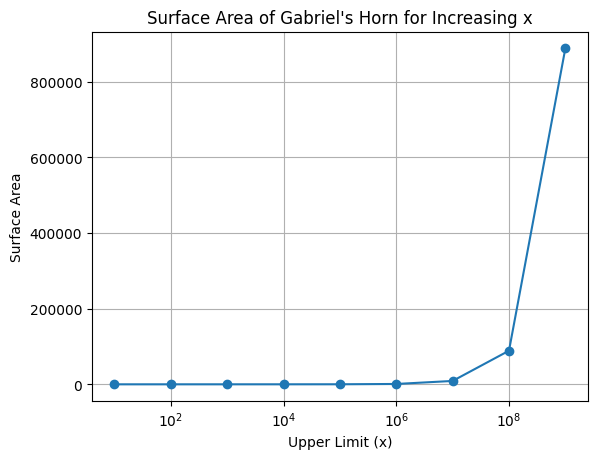

In [54]:
# Gabriel's horn
def y(x):
    """Gabriel's horn"""
    return 1/x

def surface_area(f, x0, xn, N):
    """Surface area using Trapezoidal rule"""
    x = np.linspace(x0, xn, N+1)
    y = f(x)
    dx = (xn-x0)/N
    return 2*np.pi*np.sum(y*np.sqrt(1 + (1/x**2)**2) * dx)

# List to store results
results = []

# Ranges of x to compute surface area
ranges = [10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]

for r in ranges:
    area = surface_area(y, 1, r, int(1e4))
    results.append(area)

# Plotting the results
plt.plot(ranges, results, marker='o')
plt.xscale("log")
plt.xlabel('Upper Limit (x)')
plt.ylabel('Surface Area')
plt.title('Surface Area of Gabriel\'s Horn for Increasing x')
plt.grid(True)
plt.show()


No matter what you put as the upper limit of the integral, the function of the trumpet surface area will look like an exponential function that goes towards infinity. This is because the function is given by $$ f(x) = \dfrac{1}{x} $$